In [1]:
%load_ext autoreload
%autoreload 2

from herbie import Herbie
import xarray as xr 
import cartopy.crs as ccrs
import torch 
from goes2go.data import  goes_nearesttime
import numpy as np

from main import tools

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import cartopy.feature as cfeature


/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
from main import get_data, model

In [6]:
data_sets = []
date = "2024-08-31"
minutes = 60
extent =[-91.65, -75.46, 30.14, 36.68]
level = "CMI_C09"
T, XY, Z, XY_UV = get_data.goes(date=date, 
                            band=level,
                            minutes = minutes,
                            extent=extent, 
                            factor = 1)


 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-MCMIPC/2024/244/00/OR_ABI-L2-MCMIPC-M6_G16_s20242440001172_e20242440003551_c20242440004066.nc
📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [7]:
data_entry = model.data(T, XY, Z, XY_UV)
data_entry.extent = extent
data_entry.date = date
data_entry.level = level


In [8]:
data_entry.T

tensor([0.0000, 0.0417, 0.0833, 0.1250, 0.1667])

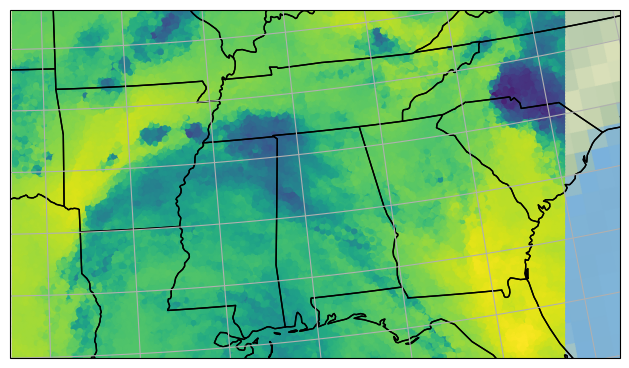

In [9]:
indices = torch.randperm(data_entry.m)
f = data_entry.plot_observations(indices, frame = 2)